# 테스트

In [ ]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 61.8 MB/s eta 0:00:00


좌표 (37.5665, 126.978)은 서울특별시에 포함됩니다.


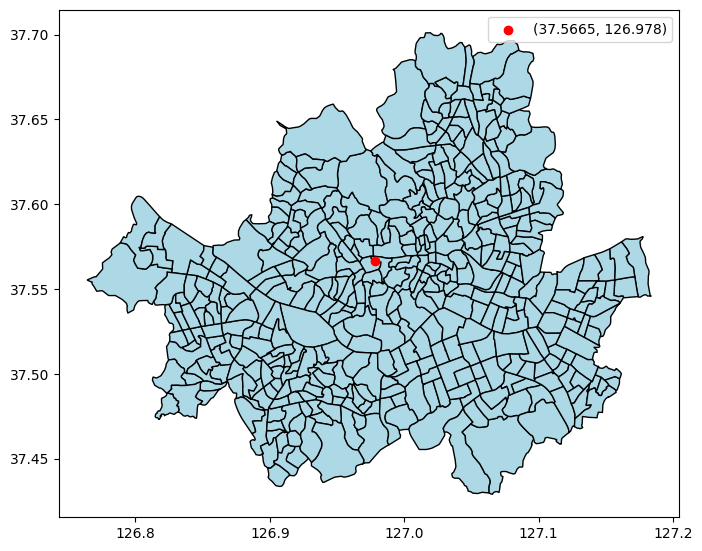

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# 1. 서울 경계 GeoJSON 데이터 불러오기
seoul_geojson_path = '/content/seoul_boundary.geojson'  # 서울 경계 GeoJSON 파일 경로
seoul_gdf = gpd.read_file(seoul_geojson_path)

# 2. 좌표 생성 (예시로 서울 내의 좌표 입력)
lat, lon = 37.5665, 126.9780
point = Point(lon, lat)

# 3. 좌표가 서울 경계 안에 포함되는지 확인
is_inside = seoul_gdf.contains(point).any()  # 서울 경계 내에 포인트가 포함되는지 여부

# 결과 출력
if is_inside:
    print(f"좌표 ({lat}, {lon})은 서울특별시에 포함됩니다.")
else:
    print(f"좌표 ({lat}, {lon})은 서울특별시에 포함되지 않습니다.")

# 4. 도형 그리기
fig, ax = plt.subplots(figsize=(8, 8))
seoul_gdf.plot(ax=ax, color='lightblue', edgecolor='black')
plt.scatter(lon, lat, color='red', marker='o', label=f"({lat}, {lon})")
plt.legend()
plt.show()


# 필터링

## 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [ ]:
import zipfile
import os

input_path = '/content/drive/MyDrive/final_project/유종진/img.zip'
output_dir = '/content/images'

os.makedirs(output_dir, exist_ok=True)

# ZIP 파일 압축 해제
with zipfile.ZipFile(input_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"압축 해제 경로: {output_dir}")

압축 해제 경로: /content/images


In [ ]:
output_dir = '/content/images'

In [ ]:
img_dir = output_dir + '/img/'
file_names = [img_dir + file for file in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, file))]
print(len(file_names))

5576


In [ ]:
import pandas as pd

centers = pd.read_csv("/content/drive/MyDrive/final_project/유종진/grid_centers.csv")
centers

파일이름                                      중심좌표
0        1   (37.71989276756757, 126.73418027272727)
1        2   (37.71989276756757, 126.74011481818182)
2        3   (37.71989276756757, 126.74604936363636)
3        4   (37.71989276756757, 126.75198390909091)
4        5   (37.71989276756757, 126.75791845454546)
...    ...                                       ...
5572  5573  (37.404666821621625, 127.19707481818182)
5573  5574  (37.404666821621625, 127.20300936363637)
5574  5575   (37.404666821621625, 127.2089439090909)
5575  5576  (37.404666821621625, 127.21487845454546)
5576  총 개수                                      5576

[5577 rows x 2 columns]

In [ ]:
centers = centers[:-1]
centers

파일이름                                      중심좌표
0        1   (37.71989276756757, 126.73418027272727)
1        2   (37.71989276756757, 126.74011481818182)
2        3   (37.71989276756757, 126.74604936363636)
3        4   (37.71989276756757, 126.75198390909091)
4        5   (37.71989276756757, 126.75791845454546)
...    ...                                       ...
5571  5572  (37.404666821621625, 127.19114027272727)
5572  5573  (37.404666821621625, 127.19707481818182)
5573  5574  (37.404666821621625, 127.20300936363637)
5574  5575   (37.404666821621625, 127.2089439090909)
5575  5576  (37.404666821621625, 127.21487845454546)

[5576 rows x 2 columns]

In [ ]:
centers.columns = ['fileNum', 'center']
centers

fileNum                                    center
0          1   (37.71989276756757, 126.73418027272727)
1          2   (37.71989276756757, 126.74011481818182)
2          3   (37.71989276756757, 126.74604936363636)
3          4   (37.71989276756757, 126.75198390909091)
4          5   (37.71989276756757, 126.75791845454546)
...      ...                                       ...
5571    5572  (37.404666821621625, 127.19114027272727)
5572    5573  (37.404666821621625, 127.19707481818182)
5573    5574  (37.404666821621625, 127.20300936363637)
5574    5575   (37.404666821621625, 127.2089439090909)
5575    5576  (37.404666821621625, 127.21487845454546)

[5576 rows x 2 columns]

## 꼭짓점 좌표 계산하기

In [ ]:
import math
import re

### 좌상단

In [ ]:
def cal_NW(center):
  center = re.sub(r'[()]', '', center)
  center = center.split(',')
  center[0] = float(center[0])
  center[1] = float(center[1])
  grid_real = 0.51 * 1024
  lat_dis = 111320

  lat_radian = math.radians(center[0])
  lon_dis = lat_dis * math.cos(lat_radian)
  grid_lat = grid_real / lat_dis
  grid_lon = grid_real / lon_dis

  return center[0] + (grid_lat / 2), center[1] - (grid_lon / 2)

In [ ]:
centers['NW'] = centers.center.apply(cal_NW)
centers

<ipython-input-11-dde2d4c8e8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centers['NW'] = centers.center.apply(cal_NW)


fileNum                                    center  \
0          1   (37.71989276756757, 126.73418027272727)   
1          2   (37.71989276756757, 126.74011481818182)   
2          3   (37.71989276756757, 126.74604936363636)   
3          4   (37.71989276756757, 126.75198390909091)   
4          5   (37.71989276756757, 126.75791845454546)   
...      ...                                       ...   
5571    5572  (37.404666821621625, 127.19114027272727)   
5572    5573  (37.404666821621625, 127.19707481818182)   
5573    5574  (37.404666821621625, 127.20300936363637)   
5574    5575   (37.404666821621625, 127.2089439090909)   
5575    5576  (37.404666821621625, 127.21487845454546)   

                                           NW  
0     (37.72223843770771, 126.73121486561392)  
1     (37.72223843770771, 126.73714941106847)  
2     (37.72223843770771, 126.74308395652301)  
3     (37.72223843770771, 126.74901850197756)  
4     (37.72223843770771, 126.75495304743211)  
...                                       ...  
5571  (37.40701249176176, 127.18818738619755)  
5572   (37.40701249176176, 127.1941219316521)  
5573  (37.40701249176176, 127.20005647710666)  
5574   (37.40701249176176, 127.2059910225612)  
5575  (37.40701249176176, 127.21192556801574)  

[5576 rows x 3 columns]

#### 확인

In [ ]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 91.3 MB/s eta 0:00:00


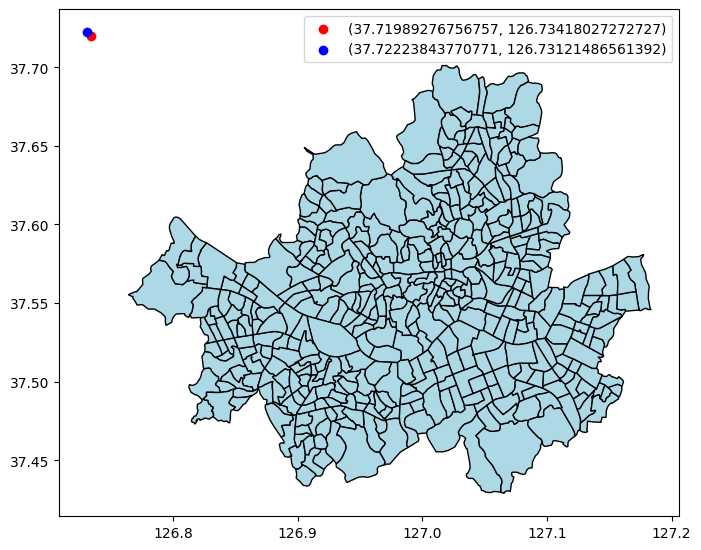

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

seoul_geojson_path = '/content/drive/MyDrive/final_project/김예지/data/hangjeongdong_서울특별시.geojson'
seoul_gdf = gpd.read_file(seoul_geojson_path)

lat1, lon1 = 37.71989276756757, 126.73418027272727
point = Point(lat1, lon1)
lat2, lon2 = 37.72223843770771, 126.73121486561392
point2 = Point(lat2, lon2)

fig, ax = plt.subplots(figsize=(8, 8))
seoul_gdf.plot(ax=ax, color='lightblue', edgecolor='black')
plt.scatter(lon1, lat1, color='red', marker='o', label=f"({lat1}, {lon1})")
plt.scatter(lon2, lat2, color='blue', marker='o', label=f"({lat2}, {lon2})")
plt.legend()
plt.show()

### 좌하단

In [ ]:
def cal_SW(center):
  center = re.sub(r'[()]', '', center)
  center = center.split(',')
  center[0] = float(center[0])
  center[1] = float(center[1])
  grid_real = 0.51 * 1024
  lat_dis = 111320

  lat_radian = math.radians(center[0])
  lon_dis = lat_dis * math.cos(lat_radian)
  grid_lat = grid_real / lat_dis
  grid_lon = grid_real / lon_dis

  return center[0] - (grid_lat / 2), center[1] - (grid_lon / 2)

In [ ]:
centers['SW'] = centers.center.apply(cal_SW)
centers

<ipython-input-15-c88101f77075>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centers['SW'] = centers.center.apply(cal_SW)


fileNum                                    center  \
0          1   (37.71989276756757, 126.73418027272727)   
1          2   (37.71989276756757, 126.74011481818182)   
2          3   (37.71989276756757, 126.74604936363636)   
3          4   (37.71989276756757, 126.75198390909091)   
4          5   (37.71989276756757, 126.75791845454546)   
...      ...                                       ...   
5571    5572  (37.404666821621625, 127.19114027272727)   
5572    5573  (37.404666821621625, 127.19707481818182)   
5573    5574  (37.404666821621625, 127.20300936363637)   
5574    5575   (37.404666821621625, 127.2089439090909)   
5575    5576  (37.404666821621625, 127.21487845454546)   

                                           NW  \
0     (37.72223843770771, 126.73121486561392)   
1     (37.72223843770771, 126.73714941106847)   
2     (37.72223843770771, 126.74308395652301)   
3     (37.72223843770771, 126.74901850197756)   
4     (37.72223843770771, 126.75495304743211)   
...                                       ...   
5571  (37.40701249176176, 127.18818738619755)   
5572   (37.40701249176176, 127.1941219316521)   
5573  (37.40701249176176, 127.20005647710666)   
5574   (37.40701249176176, 127.2059910225612)   
5575  (37.40701249176176, 127.21192556801574)   

                                            SW  
0     (37.717547097427435, 126.73121486561392)  
1     (37.717547097427435, 126.73714941106847)  
2     (37.717547097427435, 126.74308395652301)  
3     (37.717547097427435, 126.74901850197756)  
4     (37.717547097427435, 126.75495304743211)  
...                                        ...  
5571   (37.40232115148149, 127.18818738619755)  
5572    (37.40232115148149, 127.1941219316521)  
5573   (37.40232115148149, 127.20005647710666)  
5574    (37.40232115148149, 127.2059910225612)  
5575   (37.40232115148149, 127.21192556801574)  

[5576 rows x 4 columns]

#### 확인

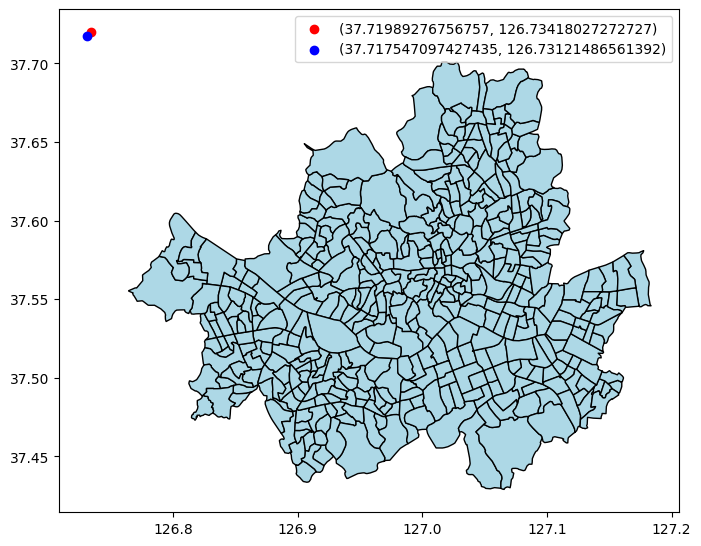

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# 1. 서울 경계 GeoJSON 데이터 불러오기
seoul_geojson_path = '/content/drive/MyDrive/final_project/김예지/data/hangjeongdong_서울특별시.geojson'
seoul_gdf = gpd.read_file(seoul_geojson_path)

# 2. 좌표 생성
lat1, lon1 = 37.71989276756757, 126.73418027272727
point = Point(lat1, lon1)
lat2, lon2 = 37.717547097427435, 126.73121486561392
point2 = Point(lat2, lon2)

# 4. 도형 그리기
fig, ax = plt.subplots(figsize=(8, 8))
seoul_gdf.plot(ax=ax, color='lightblue', edgecolor='black')
plt.scatter(lon1, lat1, color='red', marker='o', label=f"({lat1}, {lon1})")
plt.scatter(lon2, lat2, color='blue', marker='o', label=f"({lat2}, {lon2})")
plt.legend()
plt.show()

### 우상단

In [ ]:
def cal_NE(center):
  center = re.sub(r'[()]', '', center)
  center = center.split(',')
  center[0] = float(center[0])
  center[1] = float(center[1])
  grid_real = 0.51 * 1024
  lat_dis = 111320

  lat_radian = math.radians(center[0])
  lon_dis = lat_dis * math.cos(lat_radian)
  grid_lat = grid_real / lat_dis
  grid_lon = grid_real / lon_dis

  return center[0] + (grid_lat / 2), center[1] + (grid_lon / 2)

In [ ]:
centers['NE'] = centers.center.apply(cal_NE)
centers

<ipython-input-18-2fd715192ec8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centers['NE'] = centers.center.apply(cal_NE)


fileNum                                    center  \
0          1   (37.71989276756757, 126.73418027272727)   
1          2   (37.71989276756757, 126.74011481818182)   
2          3   (37.71989276756757, 126.74604936363636)   
3          4   (37.71989276756757, 126.75198390909091)   
4          5   (37.71989276756757, 126.75791845454546)   
...      ...                                       ...   
5571    5572  (37.404666821621625, 127.19114027272727)   
5572    5573  (37.404666821621625, 127.19707481818182)   
5573    5574  (37.404666821621625, 127.20300936363637)   
5574    5575   (37.404666821621625, 127.2089439090909)   
5575    5576  (37.404666821621625, 127.21487845454546)   

                                           NW  \
0     (37.72223843770771, 126.73121486561392)   
1     (37.72223843770771, 126.73714941106847)   
2     (37.72223843770771, 126.74308395652301)   
3     (37.72223843770771, 126.74901850197756)   
4     (37.72223843770771, 126.75495304743211)   
...                                       ...   
5571  (37.40701249176176, 127.18818738619755)   
5572   (37.40701249176176, 127.1941219316521)   
5573  (37.40701249176176, 127.20005647710666)   
5574   (37.40701249176176, 127.2059910225612)   
5575  (37.40701249176176, 127.21192556801574)   

                                            SW  \
0     (37.717547097427435, 126.73121486561392)   
1     (37.717547097427435, 126.73714941106847)   
2     (37.717547097427435, 126.74308395652301)   
3     (37.717547097427435, 126.74901850197756)   
4     (37.717547097427435, 126.75495304743211)   
...                                        ...   
5571   (37.40232115148149, 127.18818738619755)   
5572    (37.40232115148149, 127.1941219316521)   
5573   (37.40232115148149, 127.20005647710666)   
5574    (37.40232115148149, 127.2059910225612)   
5575   (37.40232115148149, 127.21192556801574)   

                                           NE  
0     (37.72223843770771, 126.73714567984062)  
1     (37.72223843770771, 126.74308022529517)  
2     (37.72223843770771, 126.74901477074971)  
3     (37.72223843770771, 126.75494931620426)  
4     (37.72223843770771, 126.76088386165881)  
...                                       ...  
5571  (37.40701249176176, 127.19409315925698)  
5572  (37.40701249176176, 127.20002770471153)  
5573  (37.40701249176176, 127.20596225016608)  
5574  (37.40701249176176, 127.21189679562062)  
5575  (37.40701249176176, 127.21783134107517)  

[5576 rows x 5 columns]

#### 확인

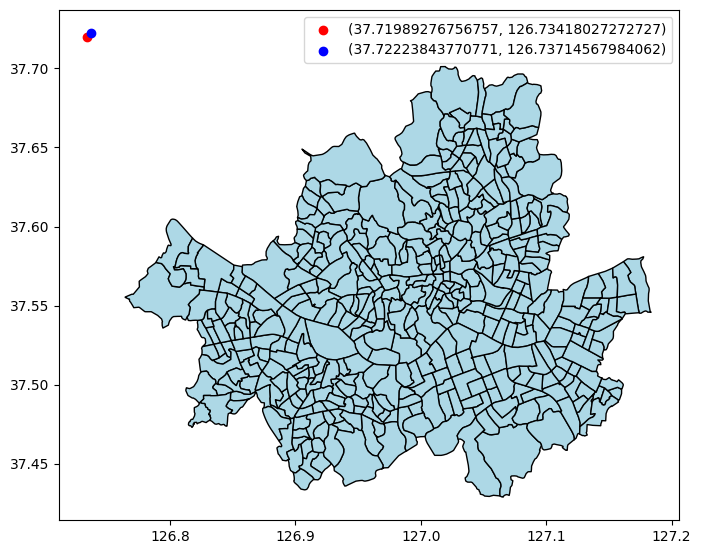

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

seoul_geojson_path = '/content/drive/MyDrive/final_project/김예지/data/hangjeongdong_서울특별시.geojson'
seoul_gdf = gpd.read_file(seoul_geojson_path)

lat1, lon1 = 37.71989276756757, 126.73418027272727
point = Point(lat1, lon1)
lat2, lon2 = 37.72223843770771, 126.73714567984062
point2 = Point(lat2, lon2)

fig, ax = plt.subplots(figsize=(8, 8))
seoul_gdf.plot(ax=ax, color='lightblue', edgecolor='black')
plt.scatter(lon1, lat1, color='red', marker='o', label=f"({lat1}, {lon1})")
plt.scatter(lon2, lat2, color='blue', marker='o', label=f"({lat2}, {lon2})")
plt.legend()
plt.show()

### 우하단

In [ ]:
def cal_SE(center):
  center = re.sub(r'[()]', '', center)
  center = center.split(',')
  center[0] = float(center[0])
  center[1] = float(center[1])
  grid_real = 0.51 * 1024
  lat_dis = 111320

  lat_radian = math.radians(center[0])
  lon_dis = lat_dis * math.cos(lat_radian)
  grid_lat = grid_real / lat_dis
  grid_lon = grid_real / lon_dis

  return center[0] - (grid_lat / 2), center[1] + (grid_lon / 2)

In [ ]:
centers['SE'] = centers.center.apply(cal_SE)
centers

<ipython-input-21-c9f3e9a47514>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centers['SE'] = centers.center.apply(cal_SE)


fileNum                                    center  \
0          1   (37.71989276756757, 126.73418027272727)   
1          2   (37.71989276756757, 126.74011481818182)   
2          3   (37.71989276756757, 126.74604936363636)   
3          4   (37.71989276756757, 126.75198390909091)   
4          5   (37.71989276756757, 126.75791845454546)   
...      ...                                       ...   
5571    5572  (37.404666821621625, 127.19114027272727)   
5572    5573  (37.404666821621625, 127.19707481818182)   
5573    5574  (37.404666821621625, 127.20300936363637)   
5574    5575   (37.404666821621625, 127.2089439090909)   
5575    5576  (37.404666821621625, 127.21487845454546)   

                                           NW  \
0     (37.72223843770771, 126.73121486561392)   
1     (37.72223843770771, 126.73714941106847)   
2     (37.72223843770771, 126.74308395652301)   
3     (37.72223843770771, 126.74901850197756)   
4     (37.72223843770771, 126.75495304743211)   
...                                       ...   
5571  (37.40701249176176, 127.18818738619755)   
5572   (37.40701249176176, 127.1941219316521)   
5573  (37.40701249176176, 127.20005647710666)   
5574   (37.40701249176176, 127.2059910225612)   
5575  (37.40701249176176, 127.21192556801574)   

                                            SW  \
0     (37.717547097427435, 126.73121486561392)   
1     (37.717547097427435, 126.73714941106847)   
2     (37.717547097427435, 126.74308395652301)   
3     (37.717547097427435, 126.74901850197756)   
4     (37.717547097427435, 126.75495304743211)   
...                                        ...   
5571   (37.40232115148149, 127.18818738619755)   
5572    (37.40232115148149, 127.1941219316521)   
5573   (37.40232115148149, 127.20005647710666)   
5574    (37.40232115148149, 127.2059910225612)   
5575   (37.40232115148149, 127.21192556801574)   

                                           NE  \
0     (37.72223843770771, 126.73714567984062)   
1     (37.72223843770771, 126.74308022529517)   
2     (37.72223843770771, 126.74901477074971)   
3     (37.72223843770771, 126.75494931620426)   
4     (37.72223843770771, 126.76088386165881)   
...                                       ...   
5571  (37.40701249176176, 127.19409315925698)   
5572  (37.40701249176176, 127.20002770471153)   
5573  (37.40701249176176, 127.20596225016608)   
5574  (37.40701249176176, 127.21189679562062)   
5575  (37.40701249176176, 127.21783134107517)   

                                            SE  
0     (37.717547097427435, 126.73714567984062)  
1     (37.717547097427435, 126.74308022529517)  
2     (37.717547097427435, 126.74901477074971)  
3     (37.717547097427435, 126.75494931620426)  
4     (37.717547097427435, 126.76088386165881)  
...                                        ...  
5571   (37.40232115148149, 127.19409315925698)  
5572   (37.40232115148149, 127.20002770471153)  
5573   (37.40232115148149, 127.20596225016608)  
5574   (37.40232115148149, 127.21189679562062)  
5575   (37.40232115148149, 127.21783134107517)  

[5576 rows x 6 columns]

#### 확인

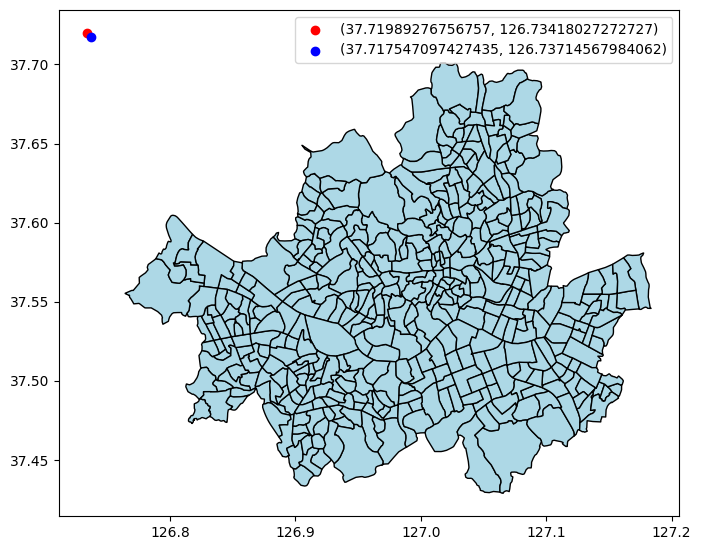

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

seoul_geojson_path = '/content/drive/MyDrive/final_project/김예지/data/hangjeongdong_서울특별시.geojson'
seoul_gdf = gpd.read_file(seoul_geojson_path)

lat1, lon1 = 37.71989276756757, 126.73418027272727
point = Point(lat1, lon1)
lat2, lon2 = 37.717547097427435, 126.73714567984062
point2 = Point(lat2, lon2)

fig, ax = plt.subplots(figsize=(8, 8))
seoul_gdf.plot(ax=ax, color='lightblue', edgecolor='black')
plt.scatter(lon1, lat1, color='red', marker='o', label=f"({lat1}, {lon1})")
plt.scatter(lon2, lat2, color='blue', marker='o', label=f"({lat2}, {lon2})")
plt.legend()
plt.show()

## 네 꼭짓점이 모두 서울이면 제거

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

def isSeoul_coord(seoul_gdf, coord):
    point = Point(coord[1], coord[0])
    is_inside = seoul_gdf.contains(point).any()
    return is_inside

seoul_geojson_path = '/content/drive/MyDrive/final_project/김예지/data/hangjeongdong_서울특별시.geojson'
seoul_gdf = gpd.read_file(seoul_geojson_path)

centers['isSeoul'] = centers.apply(lambda x: True if (isSeoul_coord(seoul_gdf, x['NW']) & isSeoul_coord(seoul_gdf, x['NE']) & isSeoul_coord(seoul_gdf, x['SW']) & isSeoul_coord(seoul_gdf, x['SE'])) else False, axis=1)
centers

In [ ]:
5576 - centers.isSeoul.sum()

In [ ]:
not_seoul = centers[centers.isSeoul == False]
not_seoul

In [ ]:
not_seoul.to_csv('grid_centers_not_seoul.csv')

In [ ]:
from tqdm import tqdm
white_images = list()
for n in tqdm(list(not_seoul.fileNum)):
  white_images.append(n + '.png')

### 제거

In [ ]:
img_dir = '/content/images/img/'
file_names = [ img_dir + file for file in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, file))]
print(len(file_names))

In [ ]:
file_names

In [ ]:
for file_name in file_names:
  gridNum = file_name.split('/')[4].split('.png')[0]
  if gridNum not in list(not_seoul.fileNum):
    os.remove(file_name)

In [ ]:
img_dir = '/content/images/img/'
file_names = [ img_dir + file for file in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, file))]
print(len(file_names))

In [ ]:
import shutil

folder_to_zip = '/content/images/img'
output_filename = "/content/drive/MyDrive/final_project/김예지/data/kakao_origin"

shutil.make_archive(output_filename, 'zip', folder_to_zip)

print("압축 완료:", output_filename + ".zip")

## 시각화

In [ ]:
from PIL import Image
import os
from tqdm import tqdm

grid_width = 82
grid_height = 68
image_folder = '/content/images/img'

resize_width = 20
resize_height = 20

image_filenames = [f"{i}.png" for i in range(1, grid_width * grid_height + 1)]

images = []
for filename in tqdm(image_filenames):
    image_path = os.path.join(image_folder, filename)
    image = Image.open(image_path)

    image = image.resize((resize_width, resize_height))

    if filename not in white_images:
        white_image = Image.new('RGB', (resize_width, resize_height), (255, 255, 255))
        images.append(white_image)
    else:
        images.append(image)

combined_width = resize_width * grid_width
combined_height = resize_height * grid_height
combined_image = Image.new('RGB', (combined_width, combined_height))

for i, image in enumerate(tqdm(images)):
    row = i // grid_width
    col = i % grid_width
    combined_image.paste(image, (col * resize_width, row * resize_height))

# 결과 이미지 저장
combined_image.save('/content/combined_image.png')

# 결과 이미지 보여주기
combined_image.show()

100%|██████████| 5576/5576 [00:00<00:00, 339612.85it/s]


In [ ]:
from PIL import Image
import os
from tqdm import tqdm

grid_width = 82
grid_height = 68
image_folder = '/content/images/img'

resize_width = 20
resize_height = 20

image_filenames = [f"{i}.png" for i in range(1, grid_width * grid_height + 1)]

images = []
for filename in tqdm(image_filenames):
    image_path = os.path.join(image_folder, filename)
    image = Image.open(image_path)

    image = image.resize((resize_width, resize_height))

    images.append(image)

combined_width = resize_width * grid_width
combined_height = resize_height * grid_height
combined_image = Image.new('RGB', (combined_width, combined_height))

for i, image in enumerate(tqdm(images)):
    row = i // grid_width
    col = i % grid_width
    combined_image.paste(image, (col * resize_width, row * resize_height))

# 결과 이미지 저장
combined_image.save('/content/combined_image.png')

# 결과 이미지 보여주기
combined_image.show()

100%|██████████| 5576/5576 [00:00<00:00, 170616.59it/s]


In [ ]:
from PIL import Image
import os
from tqdm import tqdm
import math

def visualize_images(image_folder, resize_width=20, resize_height=20):
    # 폴더에서 모든 이미지 파일 가져오기
    image_filenames = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    images = []
    for filename in tqdm(image_filenames, desc="Resizing images"):
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        image = image.resize((resize_width, resize_height))
        images.append(image)

    if not images:
        print("No images found in the folder.")
        return

    # 그리드 크기 계산 (가로 길이를 가능한 정사각형 형태로 설정)
    num_images = len(images)
    grid_width = math.ceil(math.sqrt(num_images))
    grid_height = math.ceil(num_images / grid_width)

    # 새 이미지 캔버스 생성
    combined_width = resize_width * grid_width
    combined_height = resize_height * grid_height
    combined_image = Image.new('RGB', (combined_width, combined_height))

    # 이미지 배치
    for i, image in enumerate(tqdm(images, desc="Combining images")):
        row = i // grid_width
        col = i % grid_width
        combined_image.paste(image, (col * resize_width, row * resize_height))

    # 결과 저장 및 출력
    output_path = '/content/combined_image.png'
    combined_image.save(output_path)
    combined_image.show()
    print(f"Combined image saved at: {output_path}")

# 실행
image_folder = '/content/images/img'
visualize_images(image_folder)

In [ ]:
import numpy as np
# 원본 격자 생성 (68 x 82)
original_grid = np.arange(1, 68 * 82 + 1).reshape(68, 82)
# 그리드 크기 정의
grid_size = 12
# 결과를 저장할 리스트
grids = []
grid_indices = {}
# 상단 그리드
for j in range(0, 82, grid_size):
    grid = original_grid[:grid_size, j:j+grid_size].flatten().tolist()
    grids.append(grid)
# 하단 그리드
for j in range(0, 82, grid_size):
    grid = original_grid[-grid_size:, j:j+grid_size].flatten().tolist()
    grids.append(grid)
# 좌측 그리드 (상단과 하단 제외)
for i in range(grid_size, 68 - grid_size, grid_size):
    grid = original_grid[i:i+grid_size, :grid_size].flatten().tolist()
    grids.append(grid)
# 우측 그리드 (상단과 하단 제외)
for i in range(grid_size, 68 - grid_size, grid_size):
    grid = original_grid[i:i+grid_size, -grid_size:].flatten().tolist()
    grids.append(grid)
# 결과 확인
for i, grid in enumerate(grids):
    print(f"그리드{i+1}: {grid}")
print(f"총 그리드 수: {len(grids)}")

그리드1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914]
그리드2: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 423, 424, 425, 4

In [ ]:
file_names

['/content/images/img/3185.png',
 '/content/images/img/5415.png',
 '/content/images/img/4627.png',
 '/content/images/img/3199.png',
 '/content/images/img/357.png',
 '/content/images/img/5276.png',
 '/content/images/img/2339.png',
 '/content/images/img/5388.png',
 '/content/images/img/4482.png',
 '/content/images/img/1893.png',
 '/content/images/img/3085.png',
 '/content/images/img/2229.png',
 '/content/images/img/3261.png',
 '/content/images/img/2951.png',
 '/content/images/img/690.png',
 '/content/images/img/1853.png',
 '/content/images/img/4179.png',
 '/content/images/img/2910.png',
 '/content/images/img/1970.png',
 '/content/images/img/1158.png',
 '/content/images/img/4567.png',
 '/content/images/img/1749.png',
 '/content/images/img/4917.png',
 '/content/images/img/5270.png',
 '/content/images/img/1718.png',
 '/content/images/img/1550.png',
 '/content/images/img/3002.png',
 '/content/images/img/164.png',
 '/content/images/img/115.png',
 '/content/images/img/2206.png',
 '/content/ima

In [ ]:
grids[0]

grids_1_names = ["/content/images/img/" + n for n in grids_1_names]

In [ ]:
len(grids_1_names)

144

In [ ]:
from PIL import Image
import os
from tqdm import tqdm
import math

def visualize_images(image_folder, target_filenames, resize_width=50, resize_height=50, grid_width=12):
    # 특정 파일 이름 리스트에 있는 이미지만 선택
    available_files = set(os.listdir(image_folder))
    image_filenames = sorted(
        [f for f in target_filenames if f in available_files],
        key=lambda x: int(x.split('.')[0])  # 숫자 순 정렬
    )

    images = []
    for filename in tqdm(image_filenames, desc="Resizing images"):
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path).convert("RGB")  # RGB 변환 추가
        image = image.resize((resize_width, resize_height))
        images.append(image)

    # 고정된 가로 개수 (grid_width)와 동적으로 계산된 세로 개수 설정
    num_images = len(images)
    grid_height = math.ceil(num_images / grid_width)

    # 전체 개수 맞추기 (부족한 부분은 빈 이미지 추가)
    while len(images) < grid_width * grid_height:
        images.append(Image.new("RGB", (resize_width, resize_height), (255, 255, 255)))

    # 새 이미지 캔버스 생성
    combined_width = resize_width * grid_width
    combined_height = resize_height * grid_height
    combined_image = Image.new('RGB', (combined_width, combined_height), (255, 255, 255))  # 배경 흰색 추가

    # 이미지 배치
    for i, image in enumerate(tqdm(images, desc="Combining images")):
        row = i // grid_width
        col = i % grid_width
        combined_image.paste(image, (col * resize_width, row * resize_height))

    # 결과 저장 및 출력
    output_path = '/content/combined_image.png'
    combined_image.save(output_path)
    combined_image.show()
    print(f"Combined image saved at: {output_path}")

# 실행
image_folder = '/content/images/img'
grids_1_names = [str(n) + '.png' for n in grids[0]]
visualize_images(image_folder, grids_1_names)


Combining images: 100%|██████████| 144/144 [00:00<00:00, 91999.97it/s]


Combined image saved at: /content/combined_image.png


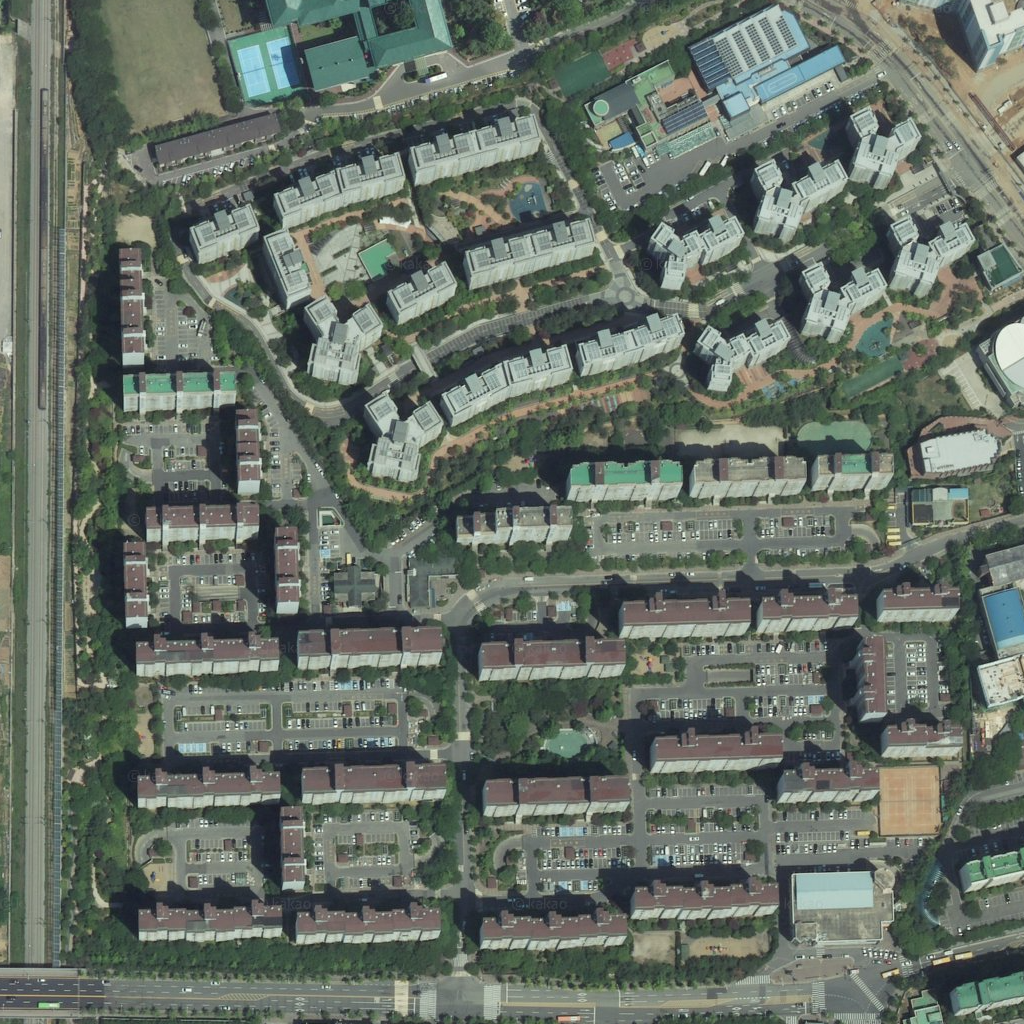

In [ ]:
#최상단에 import 를 추가한다.
from google.colab.patches import cv2_imshow
import cv2
#cv2.iimg = cv2.imread('/content/images/img/334.png', cv2.IMREAD_COLOR)mshow 함수를 cv2_imshow로 변경한다.
cv2_imshow(img)
